# Part 1 - Data Preprocessing
This notebook focus on the following data preprocessing steps:
* Data cleaning: Handling missing and null values.
* Data transformation: Feature transformation. 
* Exploratory Data Analysis (EDA)
* Feature engineering.

## Problem Description
Source: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/)

Cardiovascular diseases (CVD) are one of the leading cause of deaths worldwide. By examining the common risk factors, such as high blood cholestrol, chest pains, age risks and other factors featured in this dataset, a person's risk of having CVD could be detected earlier, thus reducing the number of deaths caused by CVD.

## Project Goal
Using a Machine Learning approach, this project's goal is to help researchers in identifying the importance and correlations of each of the risk factors mentioned above using existing CVD medical records. A Machine Learning model trained on this dataset could be used to predict if a new patient is potentially at risk of having heart disease.

## Disclaimer
As this project is done on a small dataset consisting of only 917 records, and the results are not cross-validated with domain experts, please note that the end model is not meant to be used for actual medical purposes.

### Data Dictionary

Extracted from [Heart Failure Prediction Dataset: Attribute Information](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/)

* **Age**: age of the patient [years]
* **Sex**: sex of the patient [M: Male, F: Female]
* **ChestPainType**: chest pain type
    * TA: Typical Angina,
    * ATA: Atypical Angina,
    * NAP: Non-Anginal Pain,
    * ASY: Asymptomatic
* **RestingBP**: resting blood pressure [mm Hg]
* **Cholesterol**: serum cholesterol [mm/dl]
* **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* **RestingECG**: resting electrocardiogram results
    * Normal: Normal,
    * ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
    * LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
* **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
* **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
* **ST_Slope**: the slope of the peak exercise ST segment
    * Up: upsloping,
    * Flat: flat,
    * Down: downsloping
* **HeartDisease**: output class [1: heart disease, 0: Normal]

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
file = "../data/heart.csv"

In [4]:
df = pd.read_csv(file)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 1.1 Check Missing and Null records

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
round(df.describe(), 3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000,918.000,918.000,918.000,918.000,918.000,918.000
mean,53.511,132.397,198.800,0.233,136.809,0.887,0.553
std,9.433,18.514,109.384,0.423,25.460,1.067,0.497
min,28.000,0.000,0.000,0.000,60.000,-2.600,0.000
25%,47.000,120.000,173.250,0.000,120.000,0.000,0.000
50%,54.000,130.000,223.000,0.000,138.000,0.600,1.000
75%,60.000,140.000,267.000,0.000,156.000,1.500,1.000
max,77.000,200.000,603.000,1.000,202.000,6.200,1.000


In [8]:
df[df["RestingBP"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [9]:
total_rows = df[(df["Cholesterol"]==0)].shape[0]
print(f"Total records with zero cholesterol level: {total_rows}, which is {round(100 * total_rows/df.shape[0], 2)}% of this dataset.")

total_rows = df[(df["Cholesterol"]==0) & (df["HeartDisease"]==0)].shape[0]
print(f"Total records with zero cholesterol level and no heart disease: {total_rows}")

total_rows = df[(df["Cholesterol"]==0) & (df["HeartDisease"]==1)].shape[0]
print(f"Total records with zero cholesterol level and has heart disease: {total_rows}")

Total records with zero cholesterol level: 172, which is 18.74% of this dataset.
Total records with zero cholesterol level and no heart disease: 20
Total records with zero cholesterol level and has heart disease: 152


### Summary of 1.1

There are no missing/null records.

However, the following data anormalies were identified:
* **Minimum `RestingBP` is zero**. It is not possible to have a resting blood pressure of zero, see [here](https://www.quora.com/What-will-happen-when-the-blood-pressure-goes-zero). In the code blocks above, I have further identified that there is only one record with this abnormal data, and therefore this particular record will be dropped from the dataset.
* **Minimum Serum `Cholesterol` is zero**. From a medical perspective, humans could have very low cholesterol levels but it is very rare to have zero values. This subset of data is then grouped by `HeartDisease`, and it is found that there are 152 patients identified with heart disease despite zero serum cholesterol. This contradicts the well-established medical evidence $^{[1]}$ that cholesterol levels are correlated with CVD.

Due to the nature of its data, the following features would be more suitable as categorical data type:
* `Sex`
* `ChestPainType`
* `FastingBS`
* `RestingECG`
* `ExerciseAngina`
* `ST_Slope`

### References
[1]Jung E, Kong SY, Ro YS, Ryu HH, Shin SD. Serum Cholesterol Levels and Risk of Cardiovascular Death: A Systematic Review and a Dose-Response Meta-Analysis of Prospective Cohort Studies. Int J Environ Res Public Health. 2022 Jul 6;19(14):8272. doi: 10.3390/ijerph19148272. PMID: 35886124; PMCID: PMC9316578.

In [10]:
# Drop the only record with RestingBP = 0
df = df[df['RestingBP'] > 0]
df.shape[0]

917

### 1.2 Data transformation 

Feature transformation to categorical data type: 
* `Sex`
* `FastingBS`
* `RestingECG`
* `ExerciseAngina`
* `ST_Slope`

In [11]:
category_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for c in category_cols:
    df[c] = df[c].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             917 non-null    int64   
 1   Sex             917 non-null    category
 2   ChestPainType   917 non-null    category
 3   RestingBP       917 non-null    int64   
 4   Cholesterol     917 non-null    int64   
 5   FastingBS       917 non-null    category
 6   RestingECG      917 non-null    category
 7   MaxHR           917 non-null    int64   
 8   ExerciseAngina  917 non-null    category
 9   Oldpeak         917 non-null    float64 
 10  ST_Slope        917 non-null    category
 11  HeartDisease    917 non-null    int64   
dtypes: category(6), float64(1), int64(5)
memory usage: 56.3 KB


### 1.3 Exploratory Data Analysis (EDA)
* Create a data dictionary for feature-name:description pairs.
* Separate columns by numeric and category type.
* Plot histograms to look at the correlation between features and target variable.

In [12]:
data_dict = {
    'Age': 'Age of the Patient',
    'Sex': 'Gender',
    'ChestPainType': 'chest pain type', 
    'RestingBP': 'Resting Blood Pressure [mm Hg]',
    'Cholesterol': 'Serum Cholesterol [mm/dl]',
    'FastingBS': 'Fasting Blood Sugar',
    'RestingECG': 'Resting Electrocardiogram Results',
    'MaxHR': 'Maximum Heart Rate achieved',
    'ExerciseAngina': 'Exercise-induced Angina',
    'Oldpeak': 'Oldpeak = ST',
    'ST_Slope': 'Slope of the peak exercise ST segment',
    'HeartDisease': 'Has Heart Disease'
}

In [13]:
numeric_cols = list(df.select_dtypes(include="number").columns)
category_cols = list(df.select_dtypes(exclude="number").columns)
print(numeric_cols)
print(category_cols)

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [14]:
# remove target variable from numeric features
numeric_cols.pop()
numeric_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [15]:
sns.set_style("whitegrid")
sns.set_palette("bright")

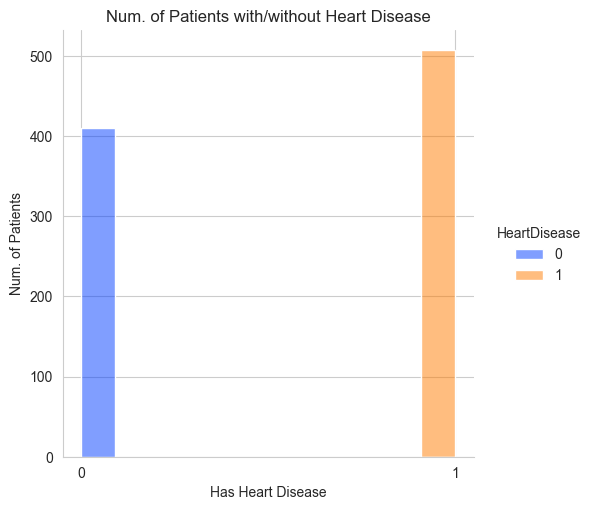

In [16]:
sns.displot(data=df, x="HeartDisease", hue="HeartDisease", kind="hist")
plt.title(f"Num. of Patients with/without Heart Disease")
plt.xticks(np.arange(0,2))
plt.xlabel(data_dict["HeartDisease"])
plt.ylabel("Num. of Patients")
plt.show()

In [17]:
def plot_histogram(data, col_list, suptitle, is_categorical=False):
    fig, ax = plt.subplots(1, len(col_list), sharey=False, figsize=(len(numeric_cols)*4, 4))
    fig.suptitle(suptitle, fontsize = 18, fontweight='bold')
    for i, col in enumerate(col_list):
        hue = col if is_categorical else None
        sns.histplot(data, x=col, hue=hue, multiple="layer", ax=ax[i], legend=None)
        ax[i].set_title(f"{data_dict[col]}")
        ax[i].set_xlabel(data_dict[col]) 
        ax[i].set_ylabel(None)
    ax[0].set_ylabel("Num. of Patients")
    fig.tight_layout()
    plt.show()

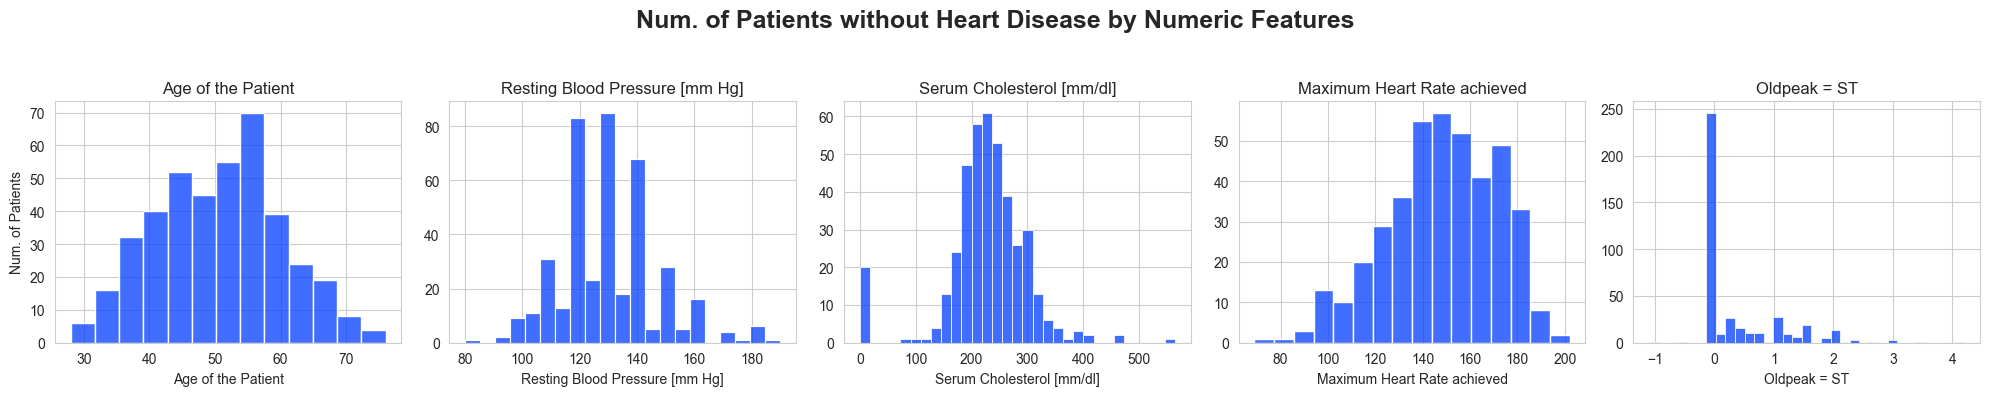

In [18]:
suptitle = "Num. of Patients without Heart Disease by Numeric Features\n"
plot_histogram(df[df["HeartDisease"]==0], numeric_cols, suptitle)

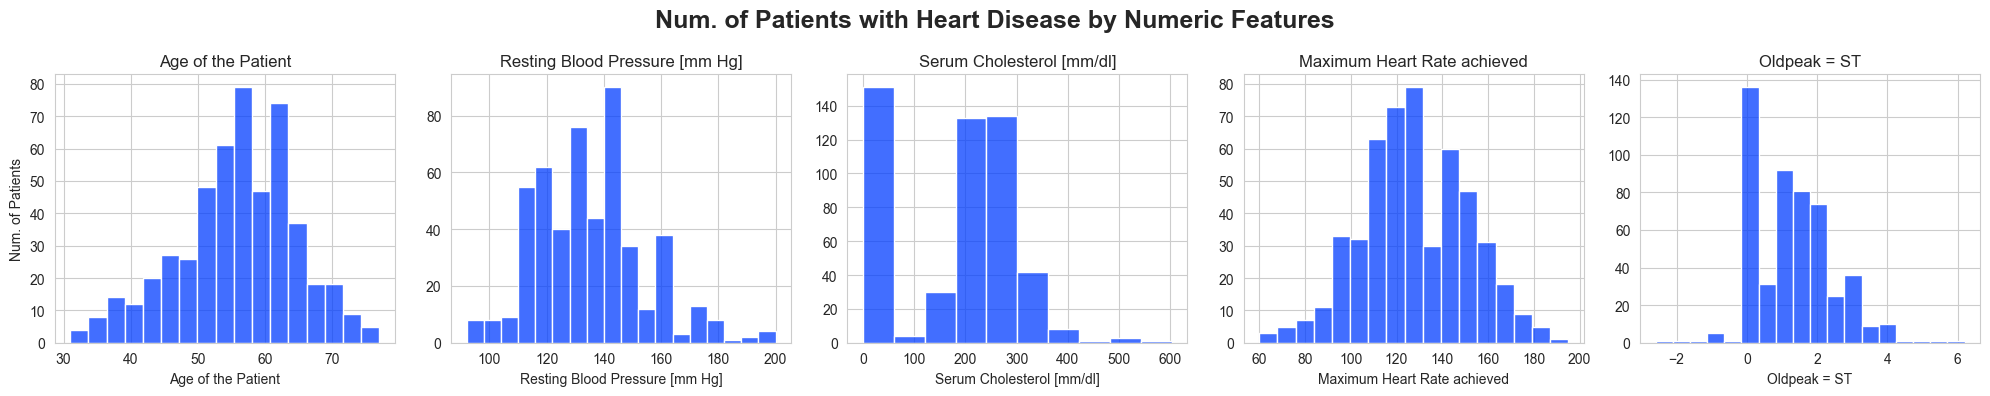

In [19]:
suptitle = "Num. of Patients with Heart Disease by Numeric Features"
plot_histogram(df[df["HeartDisease"]==1], numeric_cols, suptitle)

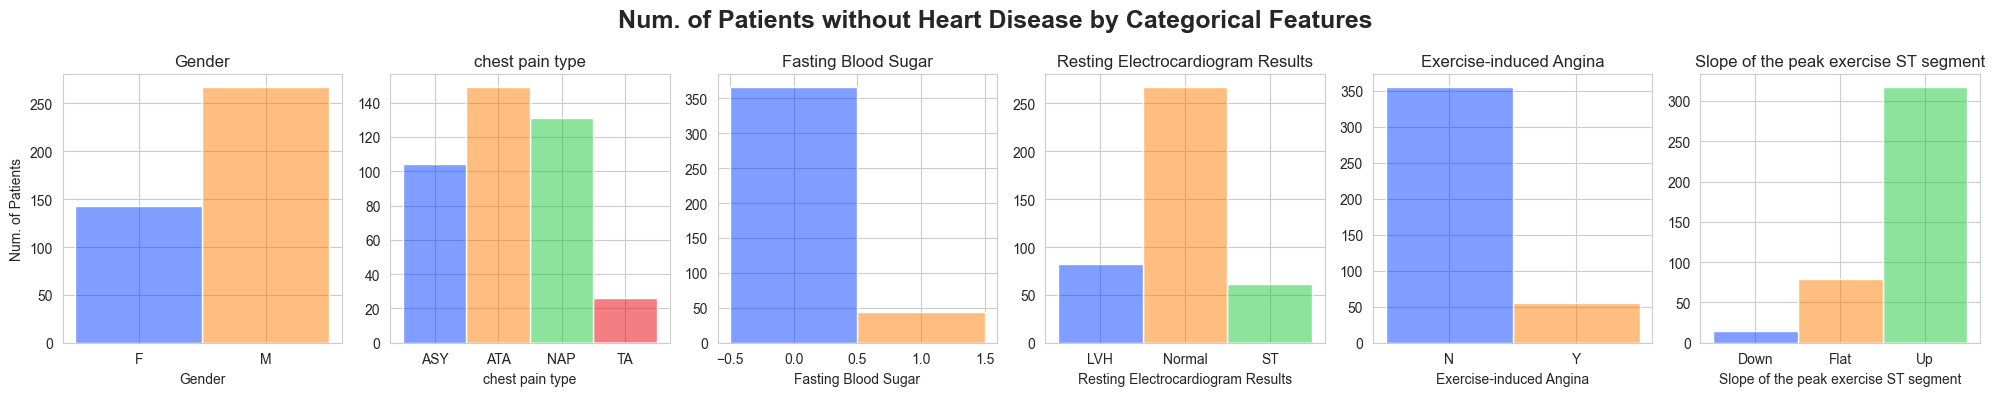

In [20]:
suptitle = "Num. of Patients without Heart Disease by Categorical Features"
plot_histogram(df[df["HeartDisease"]==0], category_cols, suptitle, True)

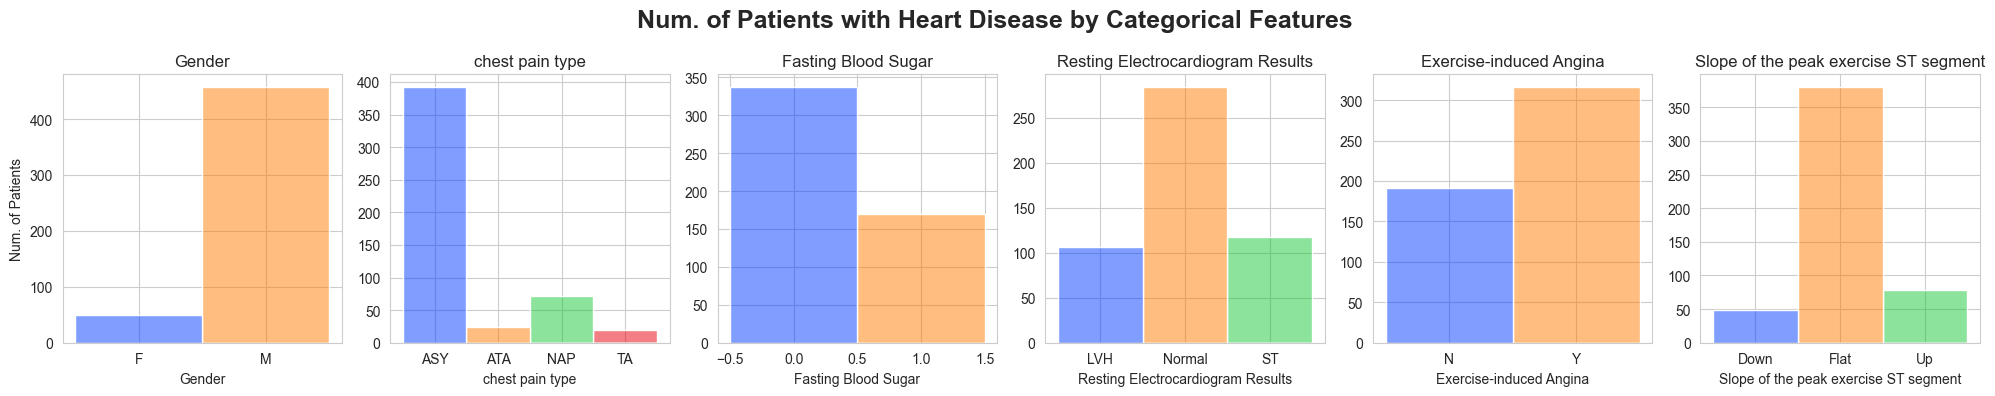

In [21]:
suptitle = "Num. of Patients with Heart Disease by Categorical Features"
plot_histogram(df[df["HeartDisease"]==1], category_cols, suptitle, True)

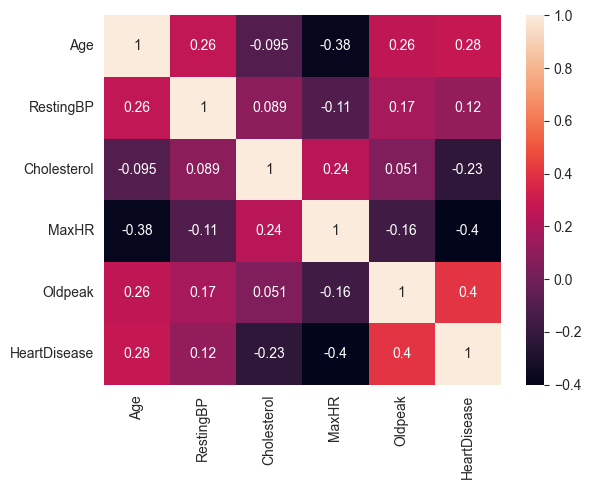

In [22]:
numeric_cols.append("HeartDisease")
sns.heatmap(df[numeric_cols].corr(), annot=True)
plt.show()

### Summary of 1.2

There is a reasonably balanced data between patients with and without heart disease.

However, imbalanced data is noted for features:
* `Gender`: Less data for women.
* `Age`: Lack of data for patients under 30.

It was not clear from the dataset if this is due to a lack of data collection from patients in these demographics. Hence, it is best to exercise caution later on during ML Modeling, and to examine the prediction errors to ensure that they do not tied to a particular demographic.

Numeric features:
* From the heatmap, it appears that `MaxHR` and `Oldpeak` are more correlated with the target `HeartDisease`.

Categorical features:
* The plots show `ChestPainType`, `ExerciseAngina`, and `ST_Slope` having strong correlations with `HeartDisease`.

### 1.4 Feature Engineering

* Replace invalid cholesterol data with imputation from non-zero data.
* Add new feature `Cholesterol_level` using this [reference](https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/lipid-panel#:~:text=Results%20are%20given%20in%20milligrams,200%20to%20239%20mg%2FdL):
    * `Normal`: Less than 200 mg/dL
    * `Borderline high`: 200 to 239 mg/dL
    * `High`: At or above 240 mg/dL

In **Section 1.3**, it is shown that the cholesterol distribution resembles a Gaussian Distribution with slight skews due to outlier data. 

Therefore to determine if the outlier greatly influences the mean or vice-versa, I examine the mean and median values of cholesterol feature.

In [23]:
mean_cholesterol = df.loc[df['Cholesterol'] > 0, 'Cholesterol'].mean()
median_cholesterol = df.loc[df['Cholesterol'] > 0, 'Cholesterol'].median()
print(f"Group mean cholesterol: {mean_cholesterol: .2f}, median cholesterol: {median_cholesterol: .2f}")

Group mean cholesterol:  244.64, median cholesterol:  237.00


Notice that the median value lies in the `Borderline high` Cholesterol level, but the mean value lies in the `High` Cholesterol level. This poses an issue with deciding on the suitable value since:
* Patients with cholesterol = 0mg are found in both groups with or without heart disease.
* There are a number of studies on how cholesterol plays a role in developing heart diseases, therefore just assigning any value affects the predictions since cholesterol is correlated with heart disease.

Ultimately, I decided to use the median value to replace those records with cholesterol = 0mg, reasons being:
* Preserve the right-skewness distribution of cholesterol v.s. heart disease.
* Median value lies in the `Borderline high` Cholesterol level which is more neutral when it comes to predicting heart disease.

In [24]:
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = int(median_cholesterol)

Cross-check dataset statistics to ensure the imputation was done properly:

In [25]:
round(df.describe(), 2)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,917.00,917.00,917.00,917.00,917.00,917.00
mean,53.51,132.54,243.21,136.79,0.89,0.55
std,9.44,18.00,53.43,25.47,1.07,0.50
min,28.00,80.00,85.00,60.00,-2.60,0.00
25%,47.00,120.00,214.00,120.00,0.00,0.00
50%,54.00,130.00,237.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,156.00,1.50,1.00
max,77.00,200.00,603.00,202.00,6.20,1.00


Add new feature `Cholesterol_Level`

In [26]:
def get_cholesterol_level(c):
    if c < 200:
        return 'Normal'
    elif c <= 239:
        return 'Borderline high'
    else:
        return 'High'

In [27]:
df['Cholesterol_Level'] = df['Cholesterol'].map(get_cholesterol_level)

In [28]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_Level
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,High
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Normal
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,High
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Borderline high
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Normal


Saved the cleaned dataset into `heart_clean.csv` for **Part 2: Machine Learning Modeling** 

In [29]:
output = "../data/heart_clean.csv"
df.to_csv(output, index=None)